In [1]:
import warnings
import pandas as pd
import utils.plot as custom_plt
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('Database/rainfall_train.csv', index_col=0)
df_test = pd.read_csv('Database/rainfall_test.csv', index_col=0)

In [4]:
mask = df['rainfall_train.class_interval'] == -999
df = df[~mask]

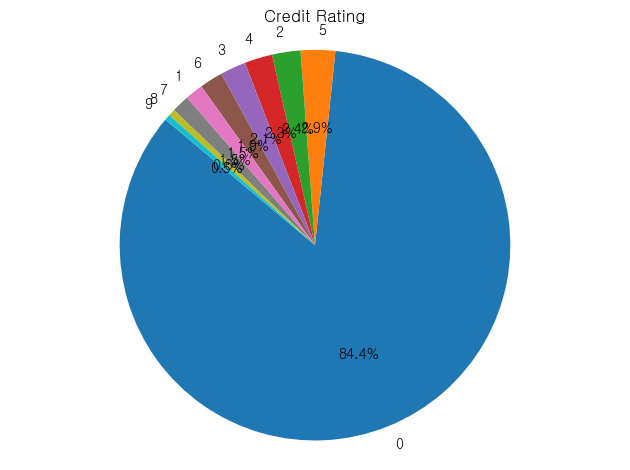

In [5]:
custom_plt.plot_imabalance(df, 'rainfall_train.class_interval')

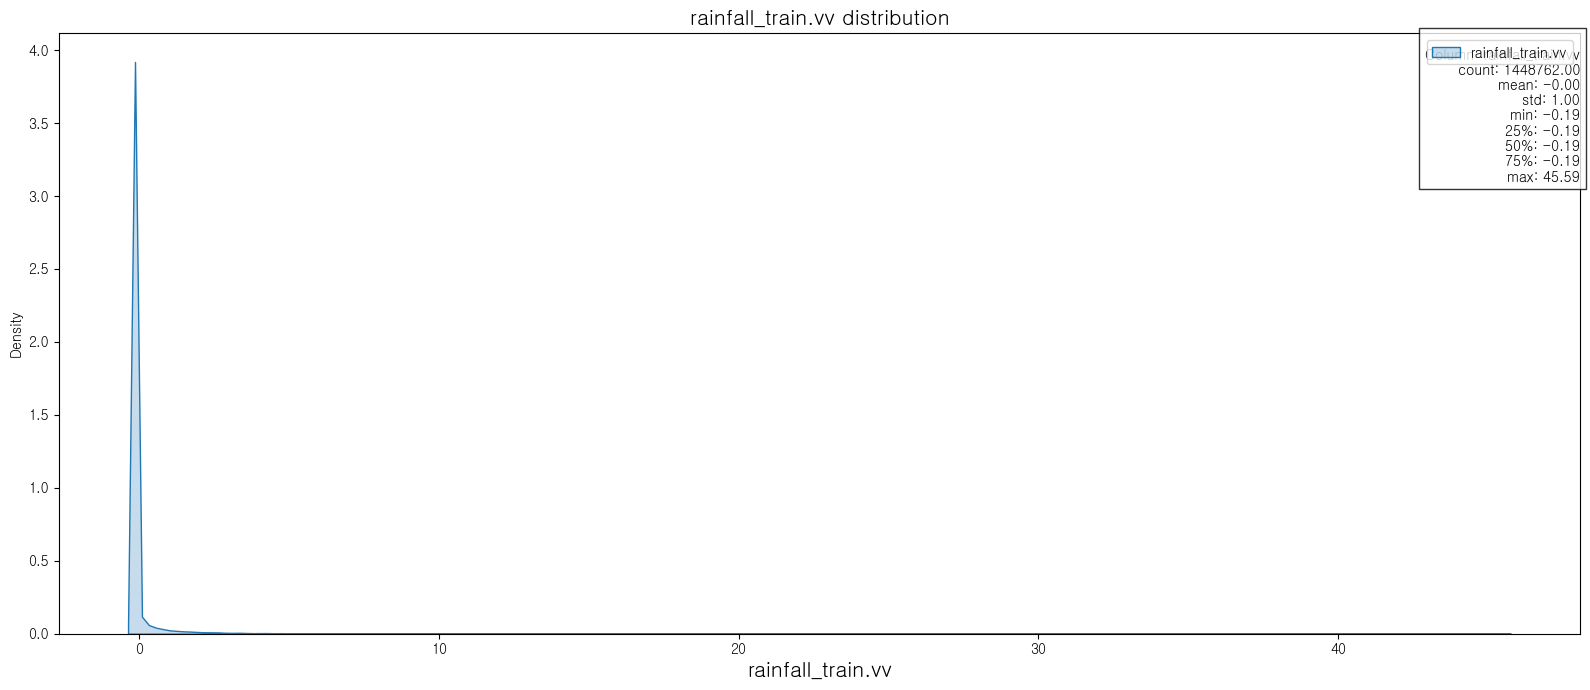

In [6]:
custom_plt.plot_continuous_variable(df, 'rainfall_train.vv', 'kde', False, True)

In [7]:
import numpy as np
from scipy import stats

for i in range(20):
    aws = df['rainfall_train.stn4contest'].unique().tolist()
    mask = (df['rainfall_train.fc_month'] == 5) & (df['rainfall_train.stn4contest'] == f'{aws[i]}')
    df_boxcox = pd.Series(stats.boxcox(df[mask]['rainfall_train.vv'] + 1)[0])
    df_log = pd.DataFrame(df[mask]['rainfall_train.vv']).applymap(lambda x: np.log(x + 1))
    print(f'{aws[i]}')
    print(df_boxcox.skew())

STN001
2.411875489524851
STN002
2.3638936668324293
STN003
2.8837078288670552
STN004
2.474224950822478
STN005
2.521386095449889
STN006
2.613667586033683
STN007
2.503720004705649
STN008
3.0592914093804837
STN009
2.7509502945886775
STN010
2.7158448815301304
STN011
2.984322774477913
STN012
3.0370831980665307
STN013
3.1267746918671806
STN014
3.5356619277390062
STN015
3.1520124360071247
STN016
3.223490945708388
STN017
3.294127332401865
STN018
3.0641629838357742
STN019
2.4487307643480483
STN020
3.10081251930966


In [8]:
self_test = pd.read_csv('Database/test/X_self_test_norm.csv', index_col=0)

In [9]:
# import numpy as np
from sklearn.mixture import GaussianMixture
# 
# # BIC 스코어를 저장할 리스트를 초기화합니다.
# bic_scores = []
# 
# # 클러스터 개수의 범위를 설정합니다.
# cluster_range = range(11, 21)
# 
# # 각 클러스터 개수에 대해 GMM을 적합시키고 BIC 스코어를 계산합니다.
# for n_clusters in cluster_range:
#     gmm = GaussianMixture(n_components=n_clusters, random_state=42)
#     gmm.fit(self_test)
#     bic = gmm.bic(self_test)
#     bic_scores.append(bic)
#     print(f'Cluster count: {n_clusters}, BIC: {bic}')
# 
# # 최적의 클러스터 개수를 선택합니다.
# optimal_clusters = cluster_range[np.argmin(bic_scores)]
# print(f'Optimal number of clusters: {optimal_clusters}')
# 
# # BIC 스코어를 시각화합니다.
# plt.figure(figsize=(8, 6))
# plt.plot(cluster_range, bic_scores, marker='o')
# plt.title('BIC Scores for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('BIC Score')
# plt.show()


In [10]:
gmm = GaussianMixture(n_components=13, random_state=42)
gmm.fit(self_test)

GaussianMixture(n_components=13, random_state=42)

In [11]:
train=pd.read_csv('Database/val/X_val_norm.csv', index_col=0)

In [12]:
# (pd.DataFrame(gmm.predict(train)).value_counts().values/len(train)*100).mean()